# Dataset Analysis: Player Legend Statistics

This notebook analyzes player performance statistics for various Legends from a gaming dataset. Each legend falls into specific categories: **Assault**, **Skirmisher**, **Support**, **Controller**, and **Recon**.


## 2. Data Import and Initial Inspection

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


## 3. Load and Combine Datasets

In [87]:
# Define legend categories
legend_categories = {
    'Assault': ['Bangalore', 'Fuse', 'Ash', 'Mad Maggie', 'Ballistic'],
    'Skirmisher': ['Pathfinder', 'Wraith', 'Octane', 'Revenant', 'Horizon', 'Valkyrie','Alter'],
    'Recon': ['Bloodhound', 'Crypto', 'Seer', 'Vantage'],
    'Support': ['Gibraltar', 'Lifeline', 'Mirage', 'Loba', 'Newcastle', 'Conduit'],
    'Controller': ['Caustic', 'Wattson', 'Rampart', 'Catalyst']
}

# Flatten the dictionary to map legend to category
legend_to_category = {}
for category, legends in legend_categories.items():
    for legend in legends:
        legend_to_category[legend] = category


In [88]:

base_path = r'C:\Users\altaa\Documents\GitHub\Apex-Legends-Research-Dataset-Analysis\Legend Stats Dataset'

damage_path = os.path.join(base_path, 'Legend Damage')
kills_path = os.path.join(base_path, 'Legend Kills')
matches_path = os.path.join(base_path, 'Legend Matches Played')
wins_path = os.path.join(base_path, 'Legend Wins')
# Function to list files in a directory
def list_files(directory):
    print(f"Files in {directory}:")
    for f in os.listdir(directory):
        print(f)


# Initialize an empty list to hold dataframes for each legend
legend_dataframes = []

# Get list of legends
legends = list(legend_to_category.keys())


In [89]:

#Loop over each legend
for legend in legends:
    try:
        # Build file paths for the legend
        legend_damage_file = os.path.join(damage_path, f"{legend}_damage.csv")
        legend_kills_file = os.path.join(kills_path, f"{legend}_kills.csv")
        legend_matches_file = os.path.join(matches_path, f"{legend}_games_played.csv")  # Updated suffix
        legend_wins_file = os.path.join(wins_path, f"{legend}_wins.csv")
        
        # Check if all files exist
        required_files = [legend_damage_file, legend_kills_file, legend_matches_file, legend_wins_file]
        missing_files = [f for f in required_files if not os.path.exists(f)]
        if missing_files:
            print(f"Data files for legend '{legend}' are missing: {missing_files}. Skipping this legend.")
            continue  # Skip to the next legend if any file is missing
        
        # Read the data files
        df_damage = pd.read_csv(legend_damage_file, header=None, names=['Damage'], skiprows=1)
        df_matches = pd.read_csv(legend_matches_file, header=None, names=['Games Played'], skiprows=1)
        df_wins = pd.read_csv(legend_wins_file, header=None, names=['Wins'], skiprows=1)

        # Custom converter to handle numeric values and ignore non-numeric ones
        def convert_number(s):
            try:
                # Remove commas and quotes, then convert to integer
                return int(str(s).replace(',', '').replace('"', '').strip())
            except ValueError:
                # Return NaN if conversion fails
                return pd.NA

        # Read the kills CSV file with the custom converter
        df_kills = pd.read_csv(legend_kills_file, header=None, names=['Kills'], converters={0: convert_number}, skiprows=1)

        # Combine the data into a single DataFrame, aligning on index (axis=1)
        df_legend = pd.concat([df_damage.reset_index(drop=True), 
                               df_kills.reset_index(drop=True), 
                               df_matches.reset_index(drop=True), 
                               df_wins.reset_index(drop=True)], axis=1)

        # Add 'legend_name' column to identify the legend in the combined DataFrame
        df_legend['legend_name'] = legend

        # Append the processed DataFrame to the list
        legend_dataframes.append(df_legend)
    
    except Exception as e:
        # Catch any exceptions during processing and print the error
        print(f"An error occurred while processing legend '{legend}': {e}")



In [90]:
# Concatenate all legend dataframes
all_legends_df = pd.concat(legend_dataframes, ignore_index=True)
# Map legends to categories
all_legends_df['Legend_Category'] = all_legends_df['legend_name'].map(legend_to_category)
# # List of legends with missing Wins data
legends_missing_wins = ['Ballistic', 'Conduit', 'Alter', 'Newcastle']
# Filter out legends with missing Wins data
all_legends_df = all_legends_df[~all_legends_df['legend_name'].isin(legends_missing_wins)]
print(all_legends_df)


           Damage   Kills  Games Played   Wins legend_name Legend_Category
0      1335473024  192425         47418  15355   Bangalore         Assault
1        50500034  177520         35645  14088   Bangalore         Assault
2        48186631  172382         32770  13041   Bangalore         Assault
3        45909908  170902         30597  12675   Bangalore         Assault
4        45231990  168326         28659  12637   Bangalore         Assault
...           ...     ...           ...    ...         ...             ...
12995     1752140    6767           997    151    Catalyst      Controller
12996     1751077    6740           994    150    Catalyst      Controller
12997     1750218    6740           990    150    Catalyst      Controller
12998     1749964    6737           990    150    Catalyst      Controller
12999     1749508    6718           988    150    Catalyst      Controller

[11000 rows x 6 columns]


##  4. Data Cleaning and Preparation

In [91]:
# Check missing values
print(all_legends_df.isnull().sum())

# Drop rows with missing data
all_legends_df_clean = all_legends_df.dropna()

# Verify no missing values
print("\nAfter cleaning:\n", all_legends_df_clean.isnull().sum())

# Check for duplicates
duplicates = all_legends_df[all_legends_df.duplicated()]
print(f"\nNumber of duplicate rows: {len(duplicates)}")
if not duplicates.empty:
    print(duplicates)

# Remove duplicates
all_legends_df = all_legends_df.drop_duplicates()


Damage             0
Kills              0
Games Played       0
Wins               0
legend_name        0
Legend_Category    0
dtype: int64

After cleaning:
 Damage             0
Kills              0
Games Played       0
Wins               0
legend_name        0
Legend_Category    0
dtype: int64

Number of duplicate rows: 0


## Dataset Composition Insights

In [106]:
print("Dataset size:", all_legends_df.shape)
print("Number of Legends:", all_legends_df['Legend_Category'].nunique())
print("\nCategory Distribution:\n", all_legends_df['Legend_Category'].value_counts(normalize=True)*100)

Dataset size: (11000, 6)
Number of Legends: 5

Category Distribution:
 Legend_Category
Skirmisher    27.272727
Assault       18.181818
Recon         18.181818
Support       18.181818
Controller    18.181818
Name: proportion, dtype: float64


### Bar Graphs for Metrics per Legend

C:\Users\altaa\AppData\Local\Temp\ipykernel_31832\648201252.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=legend_avg.index, y=legend_avg.values, palette='viridis')


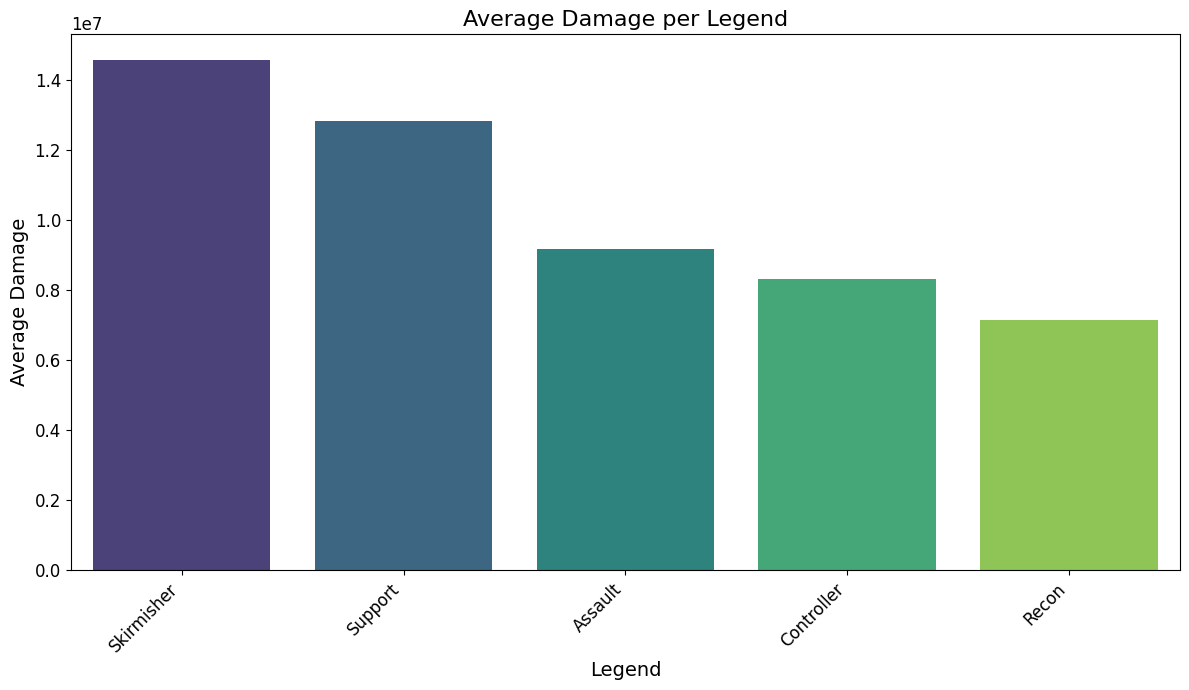

C:\Users\altaa\AppData\Local\Temp\ipykernel_31832\648201252.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=legend_avg.index, y=legend_avg.values, palette='viridis')


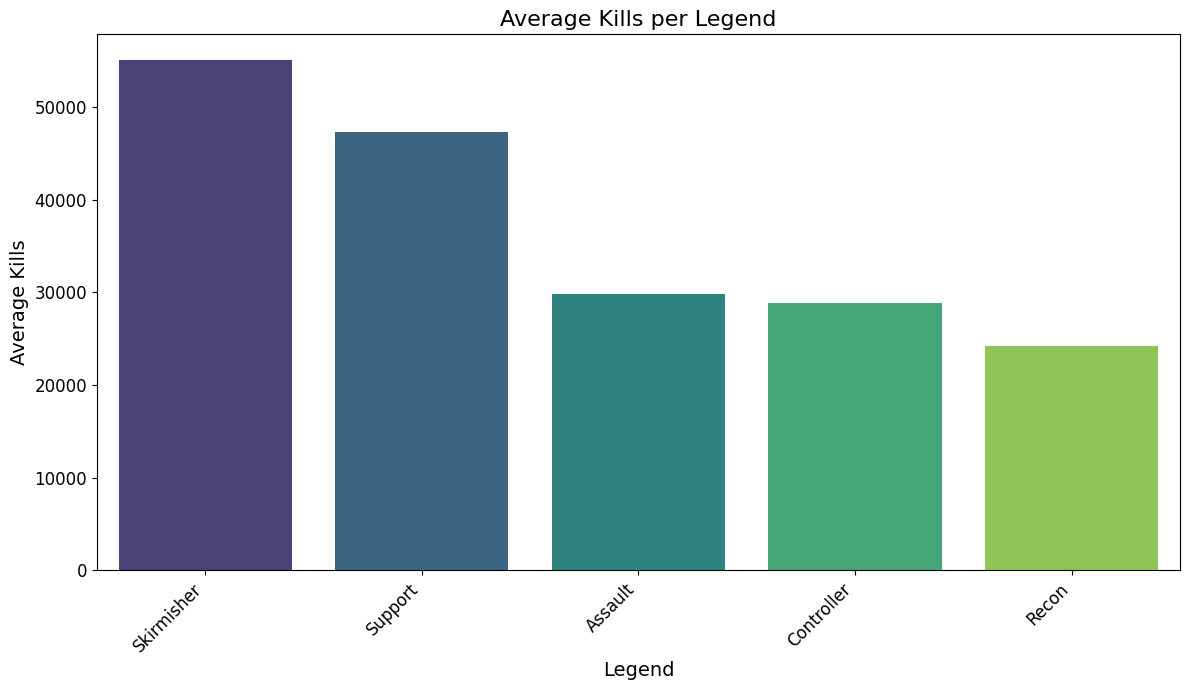

C:\Users\altaa\AppData\Local\Temp\ipykernel_31832\648201252.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=legend_avg.index, y=legend_avg.values, palette='viridis')


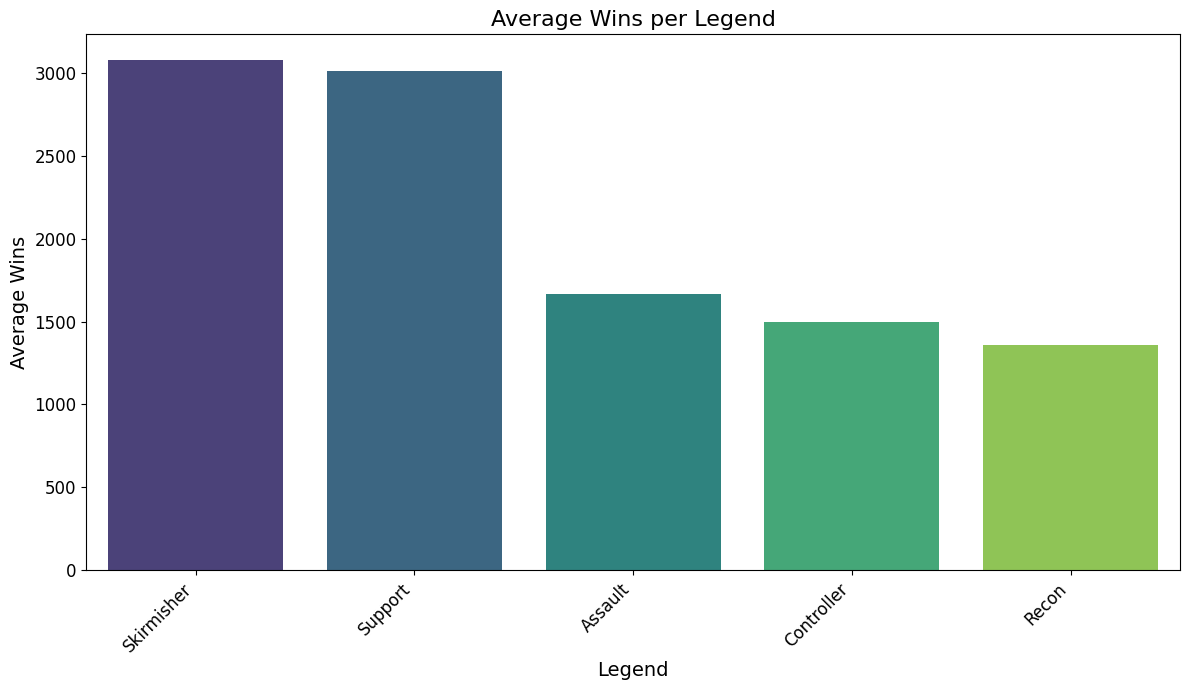

C:\Users\altaa\AppData\Local\Temp\ipykernel_31832\648201252.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=legend_avg.index, y=legend_avg.values, palette='viridis')


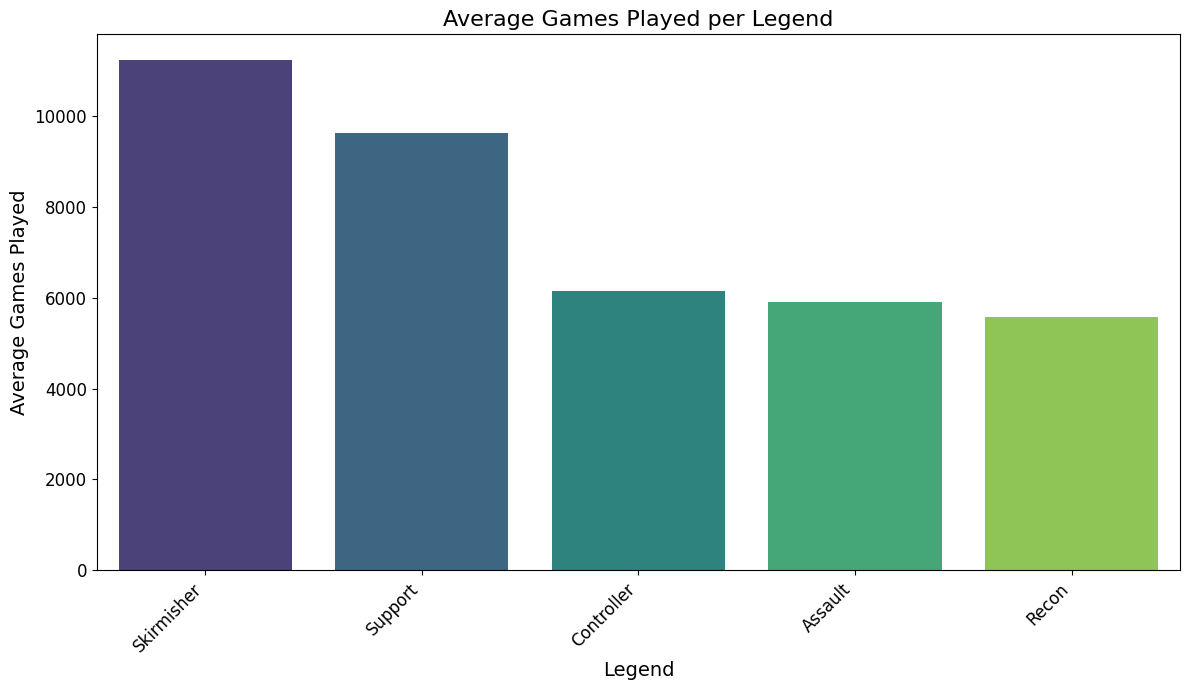

In [110]:
# Metrics to plot
metrics = ['Damage', 'Kills', 'Wins', 'Games Played']

# Set larger font sizes globally
plt.rcParams.update({'axes.labelsize': 14, 'axes.titlesize': 16, 'xtick.labelsize': 12, 'ytick.labelsize': 12})

for metric in metrics:
    plt.figure(figsize=(12, 7))
    
    # Aggregate data by Legend (mean values clearly shown)
    legend_avg = all_legends_df.groupby('Legend_Category')[metric].mean().sort_values(ascending=False)
    
    sns.barplot(x=legend_avg.index, y=legend_avg.values, palette='viridis')

    # Clear and readable labels
    plt.title(f'Average {metric} per Legend')
    plt.xlabel('Legend')
    plt.ylabel(f'Average {metric}')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()


##  5. Exploratory Data Analysis (EDA)

### Basic statistical summary

In [92]:
all_legends_df.describe()

,Damage,Kills,Games Played
count,1.100000e+04,11000.000000,11000.000000
mean,1.078737e+07,38682.611455,8027.390545
std,1.450643e+07,26907.074845,5627.099053
min,1.749508e+06,6718.000000,988.000000
25%,5.983608e+06,19613.500000,3702.750000
50%,9.452852e+06,32412.000000,6950.500000
75%,1.399547e+07,51587.500000,10882.000000
max,1.335473e+09,378931.000000,55617.000000


### Data distribution

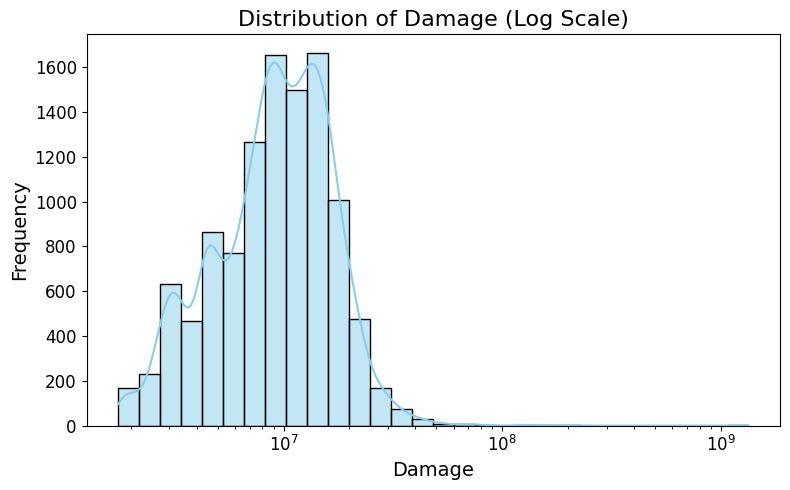

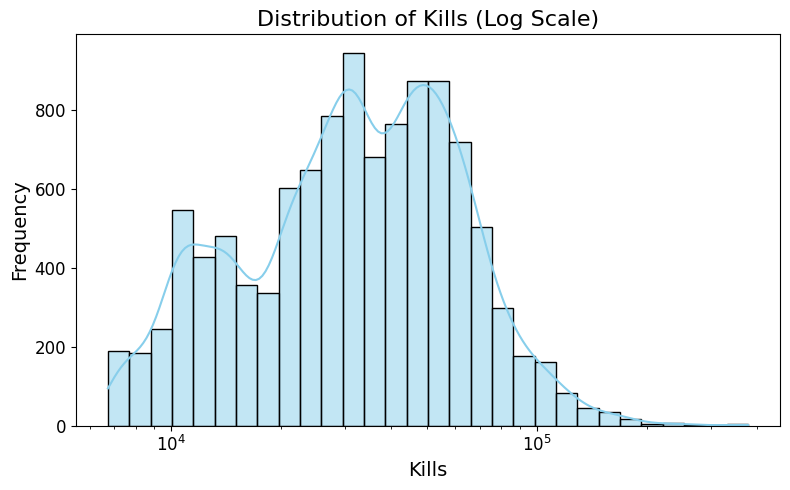

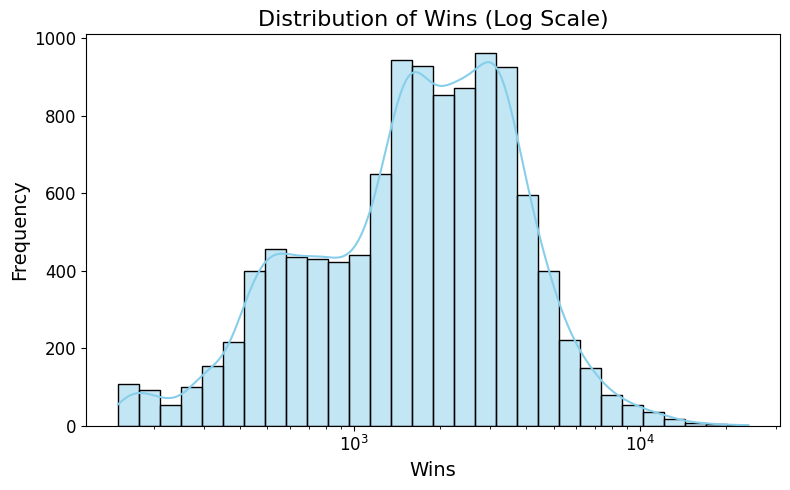

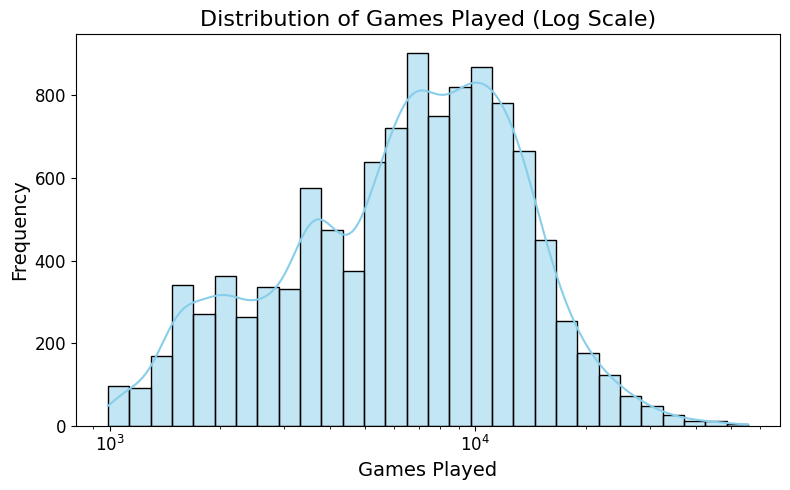

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# Increase global font sizes
plt.rcParams.update({
    'axes.labelsize': 14, 
    'axes.titlesize': 16, 
    'xtick.labelsize': 12, 
    'ytick.labelsize': 12
})

# Metrics to plot
metrics = ['Damage', 'Kills', 'Wins', 'Games Played']

for col in metrics:
    plt.figure(figsize=(8, 5))
    sns.histplot(all_legends_df[col], kde=True, log_scale=True, bins=30, color='skyblue')

    plt.title(f'Distribution of {col} (Log Scale)')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()



### Correlation Analysis

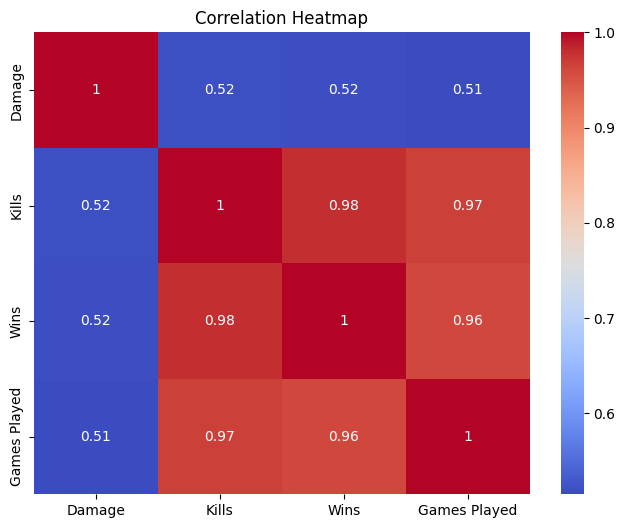

In [94]:
plt.figure(figsize=(8,6))
sns.heatmap(all_legends_df[['Damage','Kills','Wins','Games Played']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## 6. Analysis by Legend Categories

In [97]:
# Statistical summary (mean, median, std)
category_stats = all_legends_df.groupby('Legend_Category').agg({
    'Damage': ['mean', 'median', 'std'],
    'Kills': ['mean', 'median', 'std'],
    'Wins': ['mean', 'median', 'std'],
    'Games Played': ['mean', 'median', 'std']
})

print("Detailed Statistical Summary per Category:\n")
display(category_stats)


Detailed Statistical Summary per Category:



Damage                                   Kills  \
                         mean      median           std          mean   
Legend_Category                                                         
Assault          9.171342e+06   5727297.0  3.028989e+07  29781.180000   
Controller       8.323707e+06   8049158.5  5.357939e+06  28825.797500   
Recon            7.146502e+06   6616384.5  4.935110e+06  24203.651500   
Skirmisher       1.457012e+07  13673901.0  8.524632e+06  55081.732667   
Support          1.283381e+07  11587570.5  5.540715e+06  47321.135000   

                                             Wins                       \
                  median           std       mean  median          std   
Legend_Category                                                          
Assault          18508.0  24591.742966  1668.0315   868.0  1697.568358   
Controller       25520.0  20556.083284  1495.0725  1285.5  1356.193990   
Recon            20899.5  18533.477194  1356.5595  1114.5  1359.639051   
Skirmisher       51895.5  27482.324724   3078.283  2841.0  1681.392034   
Support          40764.0  24803.034961  3010.5725  2443.5  1895.651196   

                 Games Played                        
                         mean   median          std  
Legend_Category                                      
Assault           5916.636500   3904.0  4787.036011  
Controller        6158.119000   5529.0  4768.778605  
Recon             5575.521000   4165.5  4524.001195  
Skirmisher       11240.703667  10657.0  5824.931777  
Support           9639.316000   8684.5  5013.412868

C:\Users\altaa\AppData\Local\Temp\ipykernel_31832\3113720097.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Legend_Category', y=metric, data=all_legends_df, palette='Set2')


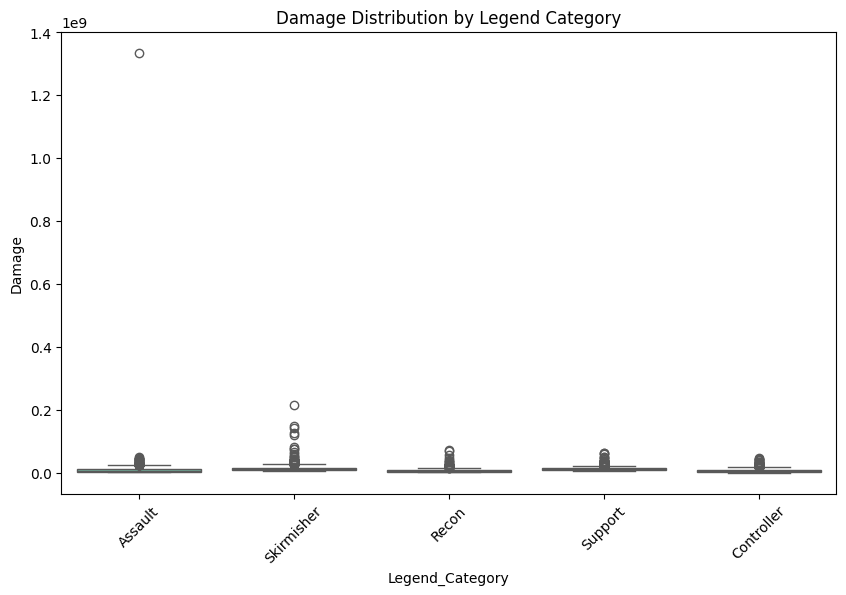

C:\Users\altaa\AppData\Local\Temp\ipykernel_31832\3113720097.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Legend_Category', y=metric, data=all_legends_df, palette='Set2')


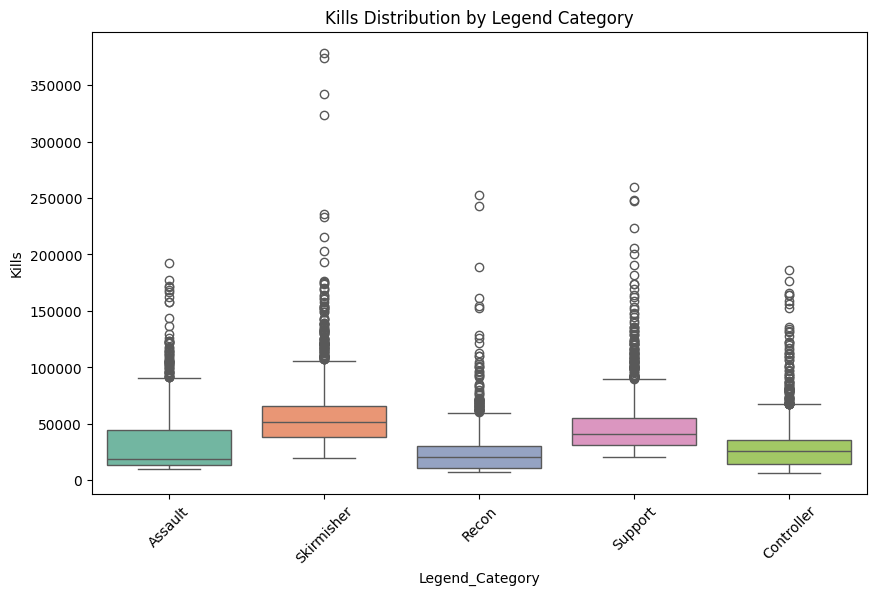

C:\Users\altaa\AppData\Local\Temp\ipykernel_31832\3113720097.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Legend_Category', y=metric, data=all_legends_df, palette='Set2')


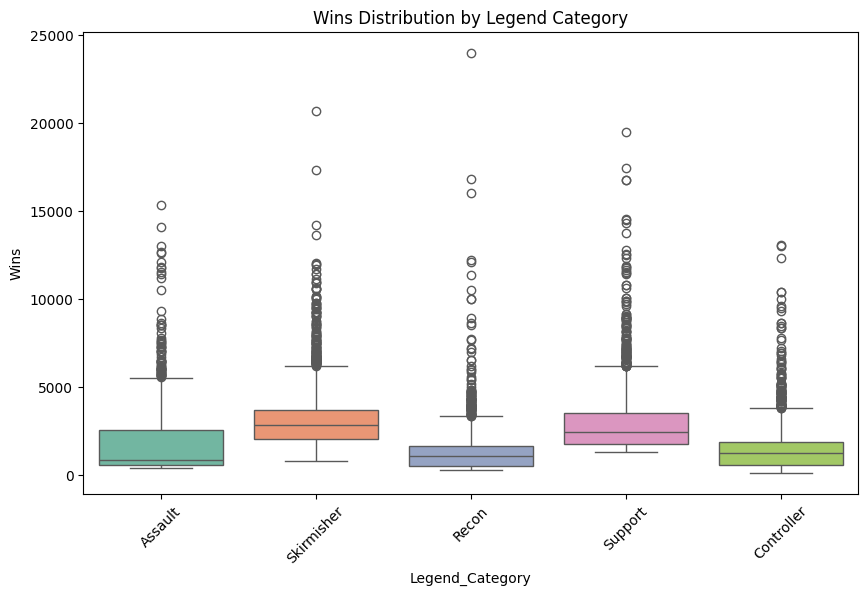

C:\Users\altaa\AppData\Local\Temp\ipykernel_31832\3113720097.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Legend_Category', y=metric, data=all_legends_df, palette='Set2')


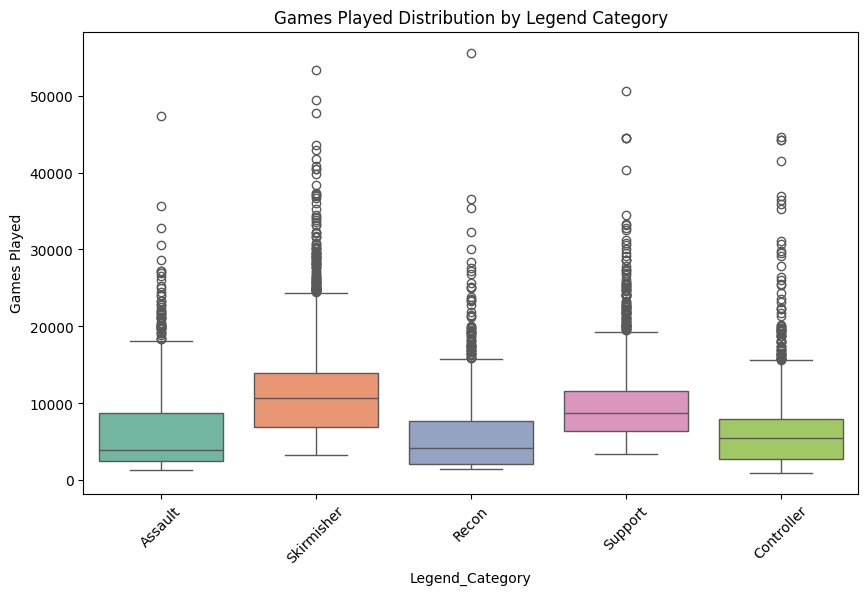

In [100]:
metrics = ['Damage', 'Kills', 'Wins', 'Games Played']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Legend_Category', y=metric, data=all_legends_df, palette='Set2')
    plt.title(f'{metric} Distribution by Legend Category')
    plt.xticks(rotation=45)
    plt.show()

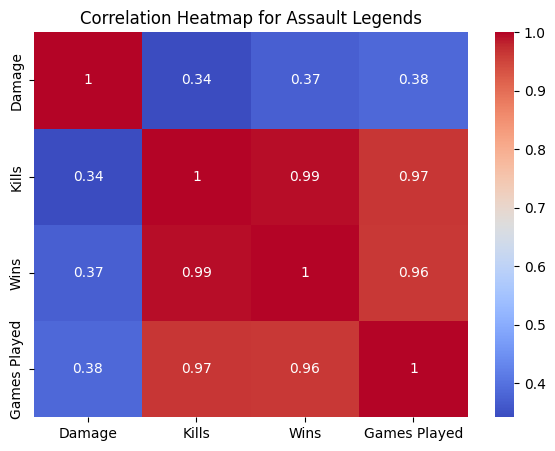

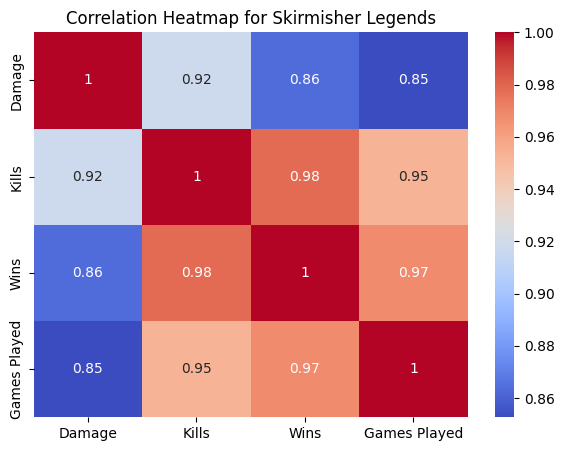

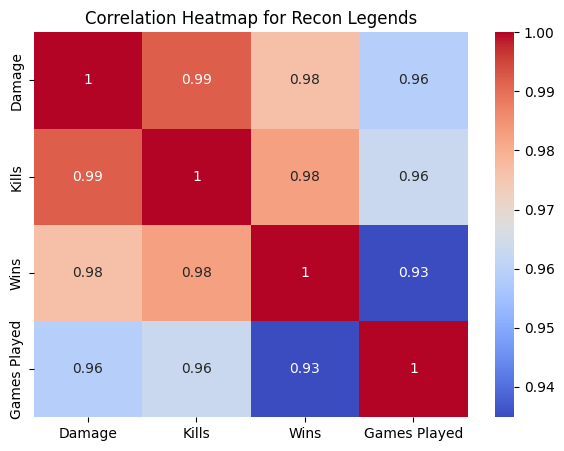

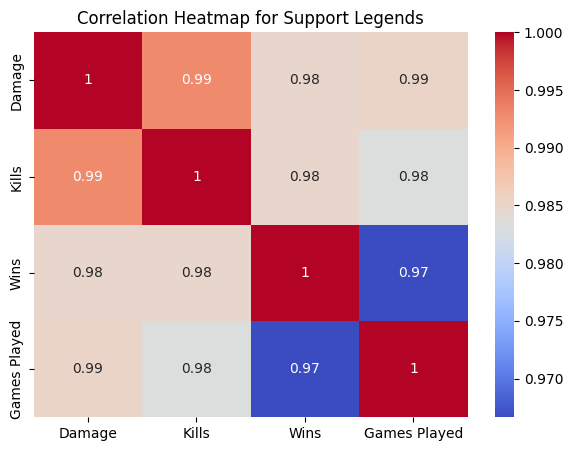

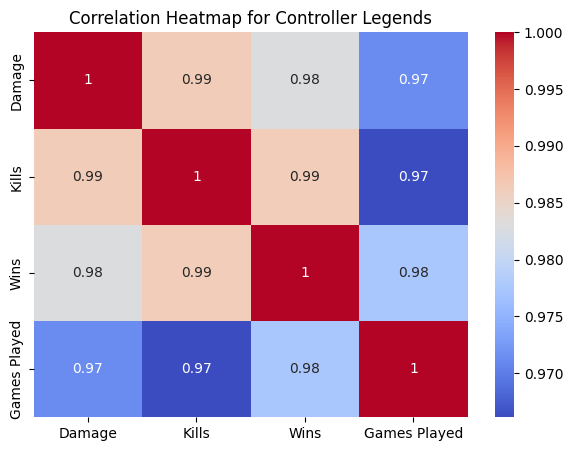

In [103]:
for category in all_legends_df['Legend_Category'].unique():
    plt.figure(figsize=(7,5))
    subset = all_legends_df[all_legends_df['Legend_Category'] == category]
    sns.heatmap(subset[['Damage','Kills','Wins','Games Played']].corr(), annot=True, cmap='coolwarm')
    plt.title(f'Correlation Heatmap for {category} Legends')
    plt.show()
